The [World Bank API](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures) provide access to [different data sets](https://data.worldbank.org/indicator).

In particular, it provides historical data about different [indicators](http://api.worldbank.org/v2/indicator?format=json) from different [countries](http://api.worldbank.org/v2/country?format=json)


For example, [to get the population US and Canada in year 2000](http://api.worldbank.org/v2/country/usa;can/indicator/SP.POP.TOTL?date=2000&format=json)

In [1]:
import requests
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
def get_data(country, indicator):
    query = f"http://api.worldbank.org/v2/country/{country}/indicator/{indicator}?format=json&per_page=1000"
    response = requests.get(query)
    data = response.json()[1]
    df = pd.DataFrame(data)[['countryiso3code', 'date', 'value']]
    df.columns = ['country', 'year', 'value']
    df['year'] = pd.to_numeric(df.year)
    return df

In [3]:
usa_gdp = get_data("usa", "NY.GDP.PCAP.PP.CD")

In [4]:
usa_education = get_data("usa", "SE.SEC.CUAT.PO.MA.ZS")

- How did gdp and education change over time?
- Is there a relationship between education and gdp?
- Do the results apply in other countries?

In [6]:
usa_gdp.columns = ['Country', 'Year', 'GDP']
usa_education.columns = ['Country', 'Year', 'Education']


In [9]:
df = pd.merge(usa_gdp, usa_education, how='outer')
df.head()

,Country,Year,GDP,Education
0,USA,2018,62641.014570,43.79341
1,USA,2017,59927.929834,NaN
2,USA,2016,57904.201961,42.31298
3,USA,2015,56803.472433,41.15227
4,USA,2014,55032.957998,40.82642


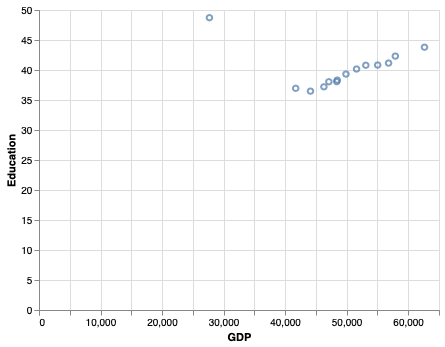

In [11]:
#try to relate with a scatter plot
alt.Chart(df).mark_point().encode(x='GDP', y='Education', tooltip='Year')

In [17]:
chart1 = alt.Chart(df).mark_line(color='red').encode(x='Year', y='Education')
chart2 = alt.Chart(df).mark_line(color='blue').encode(x='Year', y='GDP')

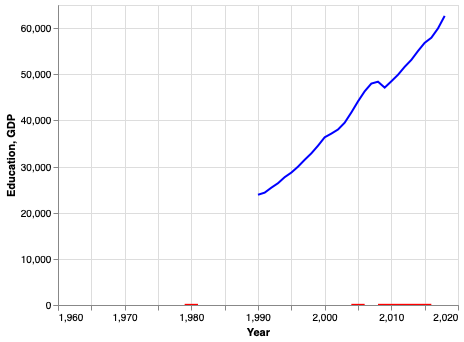

In [21]:
chart1 + chart2 #the different scale makes this chart useless

In [22]:
df['GDPk'] = df['GDP'] / 1000

In [29]:
chart3 = alt.Chart(df).mark_line(color='blue').encode(x='Year', y='GDPk')


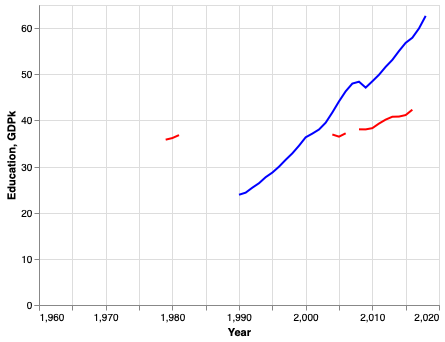

In [30]:
chart1 + chart3

In [31]:
#Do the results apply in other countries?
#we need to encapsulate the figure creation in a function

In [32]:
def visualize(country):
    country_gdp = get_data(country, "NY.GDP.PCAP.PP.CD")
    country_education = get_data(country, "SE.SEC.CUAT.PO.MA.ZS")
    country_gdp.columns = ['Country', 'Year', 'GDP']
    country_education.columns = ['Country', 'Year', 'Education']
    df = pd.merge(country_gdp, country_education, how='outer')
    df['GDPk'] = df['GDP'] / 1000
    chart1 = alt.Chart(df).mark_line(color='red').encode(x='Year', y='Education')
    chart3 = alt.Chart(df).mark_line(color='blue').encode(x='Year', y='GDPk')
    return chart1 + chart3

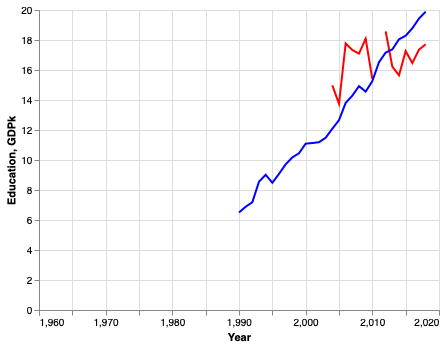

In [38]:
visualize("mex") #mexico

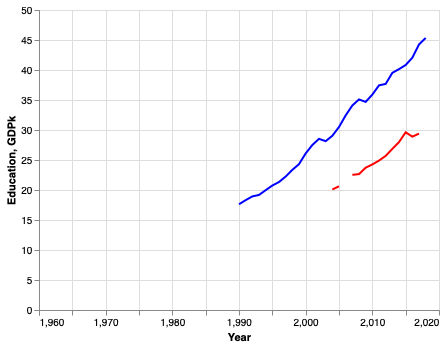

In [39]:
visualize("fra") #france

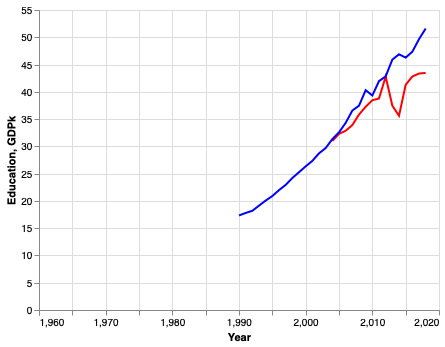

In [47]:
visualize("aus")